# Pipeline Part 2
The purpose of this notebook is to utilize new features engineered in Feature_Engineering.ipynb for use in the modeling pipeline, in order to compare the results to pipeline_architecture.ipynb.

## Initial Setup

Importing packages:

In [1]:
import pickle
from sqlalchemy import create_engine
import pandas as pd
from importlib import reload
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline

Importing the regression and classification functions:

In [3]:
from location_regression_functions import *
from pitch_cat_functions import *

Importing the functions from the pipeline script:

In [4]:
from classification_location_combo_2 import *

Pickling in initial data to work with:

In [5]:
pwd

'/Users/patrickbovard/Documents/GitHub/metis_final_project/Pitch_Classification'

In [6]:
with open('../Data/train_df_clusters.pickle','rb') as read_file:
    pitch_df = pickle.load(read_file)

In [7]:
pitch_df.head()

,inning,batter_id,pitcher_id,top,ab_id,p_score,stand,p_throws,event,home_team,...,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate,Cluster
0,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pitch_df.shape

(2848371, 49)

In [9]:
pitch_df.isnull().sum()

inning                   0
batter_id                0
pitcher_id               0
top                      0
ab_id                    0
p_score                  0
stand                    0
p_throws                 0
event                    0
home_team                0
away_team                0
b_score                  0
on_1b                    0
on_2b                    0
on_3b                    0
px                       0
pz                       0
zone                     0
pitch_type               0
start_speed              0
type                     0
b_count                  0
s_count                  0
outs                     0
pitch_num                0
last_pitch_type       3232
last_pitch_px         3232
last_pitch_pz         3232
last_pitch_speed      3214
pitcher_full_name        0
pitcher_run_diff         0
hitter_full_name         0
Date_Time_Date           0
Season                   0
cumulative_pitches       0
cumulative_ff_rate       0
cumulative_sl_rate       0
c

In [10]:
pitch_df.head(10)

,inning,batter_id,pitcher_id,top,ab_id,p_score,stand,p_throws,event,home_team,...,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate,Cluster
0,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,572761,452657,1.0,2.015000e+09,0.0,L,L,Groundout,chn,...,0.200000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,518792,452657,1.0,2.015000e+09,0.0,L,L,Double,chn,...,0.166667,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7,1.0,518792,452657,1.0,2.015000e+09,0.0,L,L,Double,chn,...,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.0
8,1.0,407812,452657,1.0,2.015000e+09,0.0,R,L,Single,chn,...,0.125000,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,407812,452657,1.0,2.015000e+09,0.0,R,L,Single,chn,...,0.111111,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pickling in the new feature engineering data:

In [11]:
with open('../Data/new_pitch_rates.pickle','rb') as read_file:
    new_rate_df = pickle.load(read_file)

In [12]:
new_rate_df.head()

,pitcher_id,batter_id,event,pitcher_full_name,pitch_type,Season,last_100_ff,last_100_sl,last_100_ft,last_100_ch,...,avg_pz_ch,avg_pz_cu,avg_pz_si,avg_pz_fc,avg_pz_kc,avg_pz_fs,avg_pz_kn,avg_pz_ep,avg_pz_fo,avg_pz_sc
0,452657,572761,Groundout,Jon Lester,FF,2015,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,452657,572761,Groundout,Jon Lester,FF,2015,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,452657,572761,Groundout,Jon Lester,FF,2015,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452657,572761,Groundout,Jon Lester,FF,2015,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452657,572761,Groundout,Jon Lester,CU,2015,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ONly taking the rates prior to 2019 to use with the training/validation data:

In [13]:
rates_pre_2019 = new_rate_df[new_rate_df.Season != 2019]
rates_pre_2019.shape

(2848371, 45)

In [14]:
rates_pre_2019.head(10)

,pitcher_id,batter_id,event,pitcher_full_name,pitch_type,Season,last_100_ff,last_100_sl,last_100_ft,last_100_ch,...,avg_pz_ch,avg_pz_cu,avg_pz_si,avg_pz_fc,avg_pz_kc,avg_pz_fs,avg_pz_kn,avg_pz_ep,avg_pz_fo,avg_pz_sc
0,452657,572761,Groundout,Jon Lester,FF,2015,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,452657,572761,Groundout,Jon Lester,FF,2015,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,452657,572761,Groundout,Jon Lester,FF,2015,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,452657,572761,Groundout,Jon Lester,FF,2015,3,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,452657,572761,Groundout,Jon Lester,CU,2015,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,452657,572761,Groundout,Jon Lester,FF,2015,4,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,452657,518792,Double,Jon Lester,FF,2015,5,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,452657,518792,Double,Jon Lester,FC,2015,6,0,0,0,...,NaN,2.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,452657,407812,Single,Jon Lester,FF,2015,6,0,0,0,...,NaN,NaN,NaN,2.047,NaN,NaN,NaN,NaN,NaN,NaN
9,452657,407812,Single,Jon Lester,FF,2015,7,0,0,0,...,NaN,NaN,NaN,2.047,NaN,NaN,NaN,NaN,NaN,NaN


The indices match up, so i'll be droppping out the name/id columns to prevent duplicates.

In [15]:
rates_pre_2019.drop(columns=['pitcher_id', 'batter_id', 'event', 'pitcher_full_name', 'pitch_type', 'Season', 'event'], inplace=True)

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Merging Dataframes:

In [16]:
merged_rate_df = pitch_df.merge(rates_pre_2019, how='left', left_index=True, right_index=True)

In [17]:
merged_rate_df.shape

(2848371, 88)

In [18]:
merged_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 88 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

Px and Pz running averages weren't computed right in SQL, just working without them for now.

In [19]:
right_rates = merged_rate_df.iloc[:, 0:62]

In [20]:
right_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848371 entries, 0 to 2848370
Data columns (total 62 columns):
 #   Column              Dtype         
---  ------              -----         
 0   inning              float64       
 1   batter_id           int64         
 2   pitcher_id          int64         
 3   top                 float64       
 4   ab_id               float64       
 5   p_score             float64       
 6   stand               object        
 7   p_throws            object        
 8   event               object        
 9   home_team           object        
 10  away_team           object        
 11  b_score             float64       
 12  on_1b               float64       
 13  on_2b               float64       
 14  on_3b               float64       
 15  px                  float64       
 16  pz                  float64       
 17  zone                object        
 18  pitch_type          object        
 19  start_speed         float64       
 20  ty

In order to utilize the new last_100 columns, created a new function file classification_location_combo-2.py. I'll also remove the following columns from the regression problems, to try to remove some features that may not factor as heavily in location:
- 'cumulative_ff_rate', 'cumulative_sl_rate', 'cumulative_ft_rate',
       'cumulative_ch_rate', 'cumulative_cu_rate', 'cumulative_si_rate',
       'cumulative_fc_rate', 'cumulative_kc_rate', 'cumulative_fs_rate',
       'cumulative_kn_rate', 'cumulative_ep_rate', 'cumulative_fo_rate',
       'cumulative_sc_rate'

### Running on the same pitcher list as in pipeline_architecture.ipynb:

In [21]:
right_rates = right_rates[right_rates.pitch_type != 'EP']

In [22]:
pitcher_list = right_rates.pitcher_full_name.value_counts().head(10).index

In [23]:
pitcher_list

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran'],
      dtype='object')

### Random Forest:

In [24]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2)

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834
Accuracy: 0.5223768333960135
Precision: (0.3871879952631076,)
Recall: 0.23656872782813407
Random Forest Pitch Classification confusion matrix results:
[[1211  122   32   11   14    0]
 [ 369  133    8    2    0    1]
 [ 311   26   26    7    7    0]
 [ 198    7    7    5    4    1]
 [ 116    1    8    2   12    0]
 [   8    7    1    0    0    2]]
Linear Regression:
Val Px R^2: 0.05934282375126654
Val Px MAE: 0.6815799737412942 ft.
Val Pz R^2: 0.1409857104537583
Val Pz MAE: 0.6270116279088975 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5955796820473052
Precision: (0.24384844066531933,)
Recall: 0.1942824783925289
Random Forest Pitch Classification confusion matrix results:
[[1428   63   29    1    0    0]
 [ 419   78   10    0    0    0]
 [ 346   34   30    1    0    0]
 [ 124    3    3    0    0    0]
 [   8    0    1    0    0    0]
 [   1    0    0    0    0    0]]
Linear Regression:
Val Px R^2: 0.09133667429979331
Val Px MAE: 0.6127888169181185 ft.
Val Pz R^2: 0.16771118063501134
Val Pz MAE: 0.6847836021154122 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
Accuracy: 0.5906635802469136
Precision: (0.5133836074127023,)
Recall: 0.3587412780425939
Random Forest Pitch Classification confusion matrix results:
[[857 357   7   7   1]
 [420 646   6  12   0]
 [144  67  13   3   0]
 [  8  22   0  14   0]
 [  4   2   0   1   1]]
Linear Regression:
Val Px R^2: 0.17498109443022714
Val Px MAE: 0.5671326919024088 ft.
Val Pz R^2: 0.1050429898771632
Val Pz MAE: 0.7870622744521534 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'FA': 6, 'UN': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001
Accuracy: 0.48297957549058873
Precision: (0.3504674168385107,)
Recall: 0.3129974576390714
Random Forest Pitch Classification confusion matrix results:
[[911 193  60   7  26]
 [406 165  46   8  25]
 [111  46 100   0   0]
 [136  41  23   2   6]
 [122  32   0   3  28]]
Linear Regression:
Val Px R^2: -0.022727648659663258
Val Px MAE: 0.6570710785192928 ft.
Val Pz R^2: 0.03225763964065709
Val Pz MAE: 0.7295030137022179 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
Accuracy: 0.4675534058847239
Precision: (0.4362371779385436,)
Recall: 0.4435779663037388
Random Forest Pitch Classification confusion matrix results:
[[614  96 113  31]
 [246 193  62 177]
 [243  79 126  71]
 [ 15 157  31 227]]
Linear Regression:
Val Px R^2: 0.022348543118974717
Val Px MAE: 0.7017788782125671 ft.
Val Pz R^2: 0.008849973423852187
Val Pz MAE: 0.6703369543894492 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'SI': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4113847396043601
Precision: (0.3023179426773957,)
Recall: 0.2663312475572455
Random Forest Pitch Classification confusion matrix results:
[[539 160  55  25  18   0]
 [215 340  45  31  15   0]
 [189 111  72  23  14   0]
 [146 121  33  36   8   0]
 [115  87  31  14  32   0]
 [  1   1   0   0   0   0]]
Linear Regression:
Val Px R^2: 0.015174896689361783
Val Px MAE: 0.6485345043411896 ft.
Val Pz R^2: 0.06154190310615604
Val Pz MAE: 0.7294320825807147 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
Accuracy: 0.47235387045813587
Precision: (0.2760249660282663,)
Recall: 0.24225938852281245
Random Forest Pitch Classification confusion matrix results:
[[1019  106   31   15    8]
 [ 414  146   26    9    3]
 [ 259   57   23    6    2]
 [ 183   32    1    7    2]
 [ 126   44    8    4    1]]
Linear Regression:
Val Px R^2: 0.06926033745757065
Val Px MAE: 0.7175299420520761 ft.
Val Pz R^2: 0.1634489994372441
Val Pz MAE: 0.6024701025512825 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
Accuracy: 0.38616251005631536
Precision: (0.3696285029317825,)
Recall: 0.31982448669456315
Random Forest Pitch Classification confusion matrix results:
[[454 121  50  89  61  10]
 [204 187  36  54  49   3]
 [155  70  74  64  29   2]
 [139  28  39 109   0   0]
 [128  57   7   0 128   2]
 [ 60  20   9  16  24   8]]
Linear Regression:
Val Px R^2: 0.1080239770243071
Val Px MAE: 0.6504051818383897 ft.
Val Pz R^2: 0.03719741006929678
Val Pz MAE: 0.693174191963308 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
Accuracy: 0.4017024726388326
Precision: (0.371668077104354,)
Recall: 0.35797085047966754
Random Forest Pitch Classification confusion matrix results:
[[520 126  83  64]
 [273 301  63  64]
 [254 108 104  41]
 [202 152  46  66]]
Linear Regression:
Val Px R^2: 0.07214810803851301
Val Px MAE: 0.6810397143605501 ft.
Val Pz R^2: 0.2174420922759105
Val Pz MAE: 0.6731612075182922 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
Accuracy: 0.4264276781992497
Precision: (0.3260250751395119,)
Recall: 0.26450028916341844
Random Forest Pitch Classification confusion matrix results:
[[785 125  75  15  12]
 [383 102  55   3   2]
 [246  43 119   8  13]
 [152  18  34   9   2]
 [152  15  18   5   8]]
Linear Regression:
Val Px R^2: 0.12027187291650365
Val Px MAE: 0.6888956501217217 ft.
Val Pz R^2: 0.10177621155816363
Val Pz MAE: 0.6783485634451133 ft.






### XGBoost:

In [25]:
output_df = multiple_pitcher_predictions(pitcher_list, right_rates, split_size = 0.2, class_method = 'XGBoost')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2460442305912834


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:37:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.5137269650244453
Precision: (0.34079501931942513,)
Recall: 0.2528408559052646
XGBoost Pitch Classification confusion matrix results:
[[1124  155   65   23   21    2]
 [ 329  165   14    1    1    3]
 [ 274   37   51    8    7    0]
 [ 180    9   14   12    5    2]
 [ 105    1   17    4   12    0]
 [   8    6    2    0    0    2]]
Linear Regression:
Val Px R^2: 0.060977052455669756
Val Px MAE: 0.6817696876542441 ft.
Val Pz R^2: 0.14172870589948672
Val Pz MAE: 0.6265680808724072 ft.




Pitch Modeling for Justin Verlander
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CU': 2, 'CH': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2522002738118521
[14:37:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5820085304381544
Precision: (0.25724468610305207,)
Recall: 0.2069841361250682
XGBoost Pitch Classification confusion matrix results:
[[1351   97   60   12    1    0]
 [ 372   93   35    7    0    0]
 [ 306   51   51    3    0    0]
 [ 105   11    8    6    0    0]
 [   9    0    0    0    0    0]
 [   0    1    0    0    0    0]]
Linear Regression:
Val Px R^2: 0.09119722282127052
Val Px MAE: 0.6127331704235418 ft.
Val Pz R^2: 0.1677644147457481
Val Pz MAE: 0.6847618506561551 ft.




Pitch Modeling for Chris Archer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'FT': 3, 'CU': 4}
Actual Test Size: 0.255042802322149
[14:38:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.5686728395061729
Precision: (0.411839145907019,)
Recall: 0.38427216518297486
XGBoost Pitch Classification confusion matrix results:
[[789 383  44   9   4]
 [404 642  22  15   1]
 [128  68  27   4   0]
 [ 14  13   3  14   0]
 [  2   2   1   1   2]]
Linear Regression:
Val Px R^2: 0.1749642950426955
Val Px MAE: 0.5670941134973007 ft.
Val Pz R^2: 0.10493546260711584
Val Pz MAE: 0.7871169840925172 ft.




Pitch Modeling for Jose Quintana
Here is the coding for last pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4, 'PO': 5, 'FA': 6, 'UN': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'CU': 1, 'SI': 2, 'CH': 3, 'FT': 4}
Actual Test Size: 0.2450441609421001


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:38:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.48217861433720466
Precision: (0.3681745004019725,)
Recall: 0.33112410180759555
XGBoost Pitch Classification confusion matrix results:
[[866 214  58  24  35]
 [367 190  47  21  25]
 [103  45 103   6   0]
 [134  43  18   7   6]
 [107  34   0   6  38]]
Linear Regression:
Val Px R^2: -0.024150105028940105
Val Px MAE: 0.6581518065011442 ft.
Val Pz R^2: 0.031693118073131354
Val Pz MAE: 0.7290907010470714 ft.




Pitch Modeling for Chris Sale
Here is the coding for last pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FA': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'SL': 1, 'CH': 2, 'FF': 3, 'FS': 4}
Actual Test Size: 0.24323529411764705
[14:38:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.4856912535268037
Precision: (0.4603349020055256,)
Recall: 0.46392685113020626
XGBoost Pitch Classification confusion matrix results:
[[579 117 126  32]
 [196 258  70 154]
 [206 103 147  63]
 [ 16 146  47 221]]
Linear Regression:
Val Px R^2: 0.023158176951936116
Val Px MAE: 0.7018768512207869 ft.
Val Pz R^2: 0.008831833532646827
Val Pz MAE: 0.6702924742765408 ft.




Pitch Modeling for Rick Porcello
Here is the coding for last pitch type:
{'FT': 0, 'FF': 1, 'CU': 2, 'SL': 3, 'CH': 4, 'EP': 5, 'SI': 6, 'PO': 7}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FT': 0, 'FF': 1, 'SL': 2, 'CU': 3, 'CH': 4, 'SI': 5}
Actual Test Size: 0.24505342303126237
[14:38:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4222850222042794
Precision: (0.3099997190026238,)
Recall: 0.2928134051226093
XGBoost Pitch Classification confusion matrix results:
[[508 130  70  56  33   0]
 [178 325  60  46  37   0]
 [159  95  94  36  25   0]
 [119 104  50  59  12   0]
 [ 93  66  35  25  60   0]
 [  0   2   0   0   0   0]]
Linear Regression:
Val Px R^2: 0.014579511480518392
Val Px MAE: 0.6487579165235614 ft.
Val Pz R^2: 0.06163437368573732
Val Pz MAE: 0.7296539594095268 ft.




Pitch Modeling for Jon Lester
Here is the coding for last pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4, 'PO': 5}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FC': 1, 'CU': 2, 'SI': 3, 'CH': 4}
Actual Test Size: 0.25269461077844313
[14:39:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.45063191153238547
Precision: (0.3229756120396764,)
Recall: 0.27528687717420275
XGBoost Pitch Classification confusion matrix results:
[[861 180  84  40  14]
 [332 187  48  22   9]
 [208  62  57  12   8]
 [152  36   8  27   2]
 [102  47  18   7   9]]
Linear Regression:
Val Px R^2: 0.06832277322182723
Val Px MAE: 0.7171517596222885 ft.
Val Pz R^2: 0.16273762113649015
Val Pz MAE: 0.6027826804355375 ft.




Pitch Modeling for Corey Kluber
Here is the coding for last pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'SI': 0, 'CU': 1, 'FF': 2, 'SL': 3, 'FC': 4, 'CH': 5}
Actual Test Size: 0.2488986784140969
[14:39:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.37530168946098147
Precision: (0.3405539839159879,)
Recall: 0.32532466669470766
XGBoost Pitch Classification confusion matrix results:
[[409 134  69  89  57  27]
 [161 189  48  61  56  18]
 [140  74  76  68  23  13]
 [126  27  40 113   0   9]
 [120  45  15   0 129  13]
 [ 58  19   8  17  18  17]]
Linear Regression:
Val Px R^2: 0.11070817523640297
Val Px MAE: 0.6491108852247449 ft.
Val Pz R^2: 0.0369725880813212
Val Pz MAE: 0.6937653011436069 ft.




Pitch Modeling for Gio Gonzalez
Here is the coding for last pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3, 'UN': 4}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'FT': 1, 'CU': 2, 'CH': 3}
Actual Test Size: 0.248214106046886
[14:39:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.41143088771787595
Precision: (0.3920216918878243,)
Recall: 0.3818984705490809
XGBoost Pitch Classification confusion matrix results:
[[471 128 104  90]
 [239 288  76  98]
 [203 102 153  49]
 [170 128  65 103]]
Linear Regression:
Val Px R^2: 0.07774964500585668
Val Px MAE: 0.6772770868024826 ft.
Val Pz R^2: 0.2167893181294701
Val Pz MAE: 0.6733684986390758 ft.




Pitch Modeling for Julio Teheran
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CU': 3, 'CH': 4, 'UN': 5, 'PO': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'FT': 2, 'CH': 3, 'CU': 4}
Actual Test Size: 0.24829227903125647
[14:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.4372655273030429
Precision: (0.3718253520071272,)
Recall: 0.3184697412936483
XGBoost Pitch Classification confusion matrix results:
[[678 177  96  26  35]
 [307 169  53   8   8]
 [187  57 145  26  14]
 [116  22  38  34   5]
 [124  20  16  15  23]]
Linear Regression:
Val Px R^2: 0.11622326311361053
Val Px MAE: 0.6892128093697096 ft.
Val Pz R^2: 0.10113891800821784
Val Pz MAE: 0.6786952652759931 ft.






This doesn't look to be much better performing than the previous run of models.

# Px/Py Outliers:

Here I'll check to see what the outlier situation looks like for Px/Py:

In [26]:
output_df.px.describe()

count    25169.000000
mean         0.041079
std          0.867177
min         -4.435097
25%         -0.546000
50%          0.052534
75%          0.639370
max          4.638494
Name: px, dtype: float64

In [27]:
output_df.pz.describe()

count    25169.000000
mean         2.322657
std          0.931682
min         -1.755906
25%          1.722934
50%          2.323000
75%          2.928965
max          6.680000
Name: pz, dtype: float64

### Box Plots:

Plotting out a box plot:

Text(0.5, 1.0, 'Pz Box Plot')

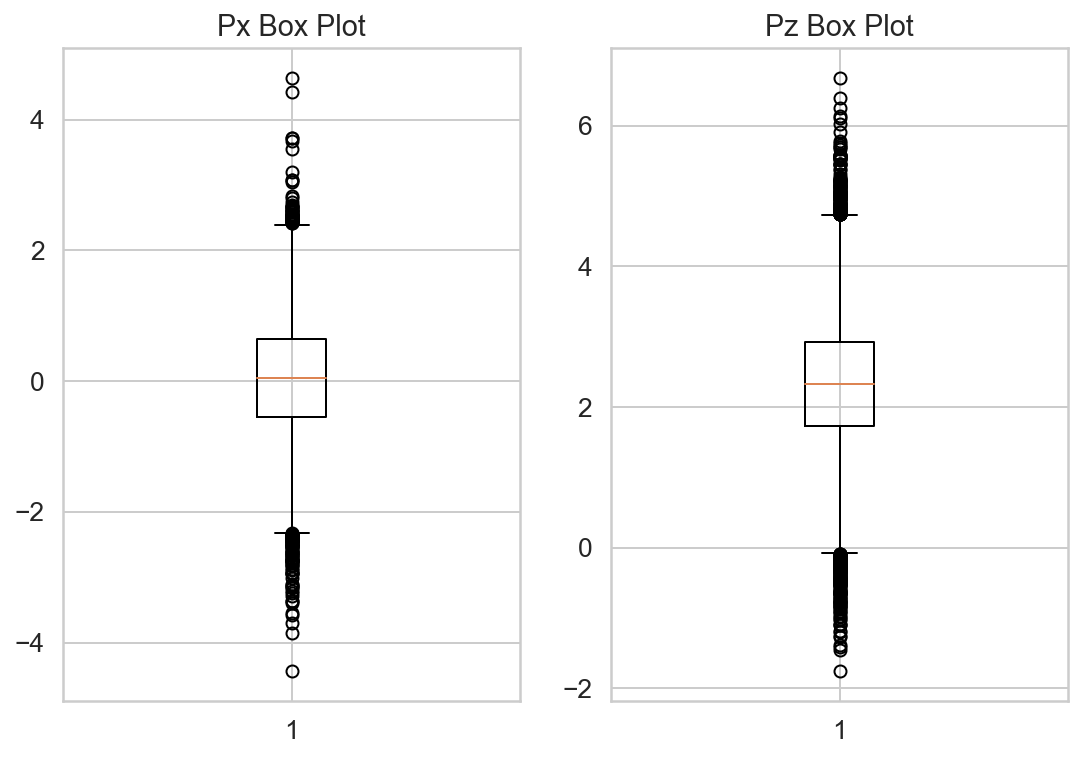

In [28]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.boxplot(output_df.px)
plt.title('Px Box Plot')
plt.subplot(1,2,2)
plt.boxplot(output_df.pz)
plt.title('Pz Box Plot')

Looking at the box plot, there are a good amount of outliers.  Looking at these, for px these are pitches that would be about 1.5 feet off the strikezone (edge of strikezone at ~+/- 0.71, since the plate is 17" wide).  Thus, these are pitches that should be obvious not to swing at.  

For pz, the lower whisker is below 0, meaning the pitch is hitting the ground before homeplate.  The upper whisker is at ~4.5, which would be ~1 foot over the top of the zone on the average strikezone.  AGain, these should be obvious pitches to not swing at.

### Histograms

Here I'll check out a histogram to see if they are somewhat normally distributed, although the box plots seem to somewhat suggest this.

Text(0.5, 1.0, 'Pz Histogram')

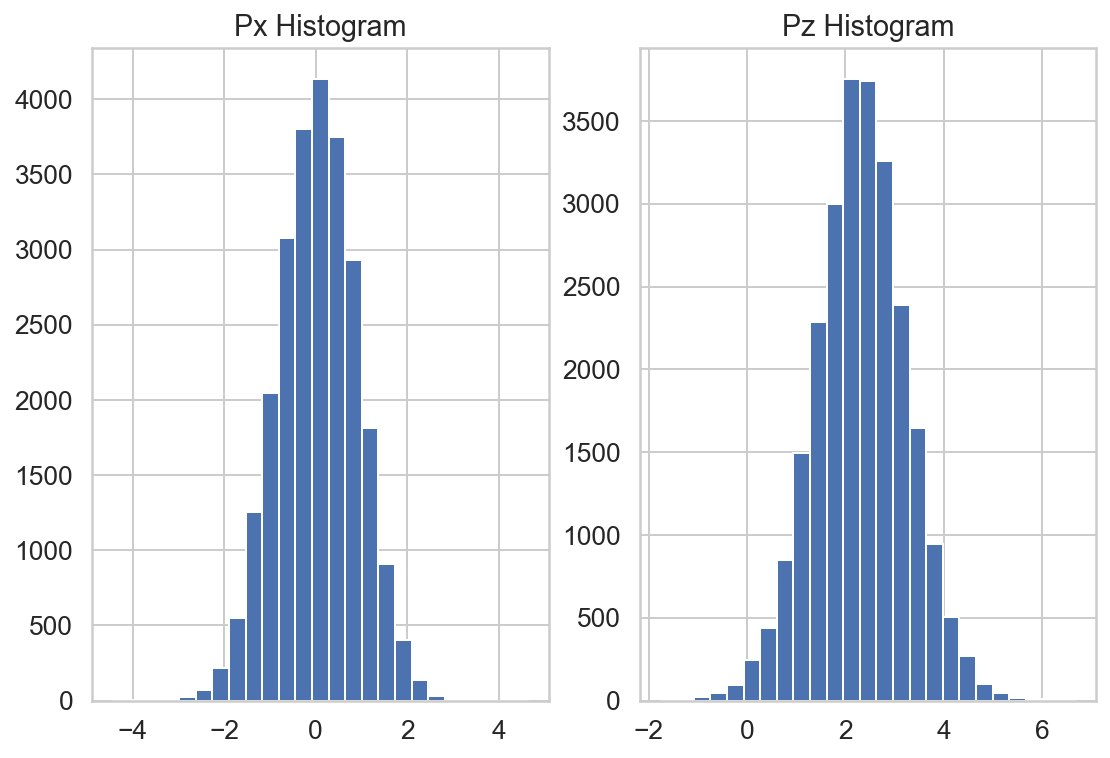

In [29]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.hist(output_df.px, bins=25)
plt.title('Px Histogram')
plt.subplot(1,2,2)
plt.hist(output_df.pz, bins=25)
plt.title('Pz Histogram')

They do seem to be relatively normally distributed, outward from the middle of the strikezone (Px = 0, Pz = ~2).

# Removing outliers

For this, I'll be trying to retrain a model with outliers beyond the whiskers removed from px and pz.

In [30]:
#Defining interquartile range for Px and pz:
px_iqr = right_rates.px.quantile(0.75) - right_rates.px.quantile(0.25)
pz_iqr = right_rates.pz.quantile(0.75) - right_rates.pz.quantile(0.25)

#Whiskers are at 1.5 above and below the 25th/75th percentile:
px_lower = right_rates.px.quantile(0.25) - 1.5*px_iqr
px_upper = right_rates.px.quantile(0.75) + 1.5*px_iqr

pz_lower = right_rates.pz.quantile(0.25) - 1.5*pz_iqr
pz_upper = right_rates.pz.quantile(0.75) + 1.5*pz_iqr
print(px_lower, px_upper)
print(pz_lower, pz_upper)

-2.384767786437216 2.4024229311831817
-0.16456648820112219 4.671610813668537


Filtering the right_rates dataframe for these values.  How many rows are beyond for each?

In [31]:
right_rates.shape[0] - right_rates[(right_rates.px > px_lower) & (right_rates.px < px_upper)].shape[0]

15815

In [32]:
right_rates.shape[0] - right_rates[(right_rates.pz > pz_lower) & (right_rates.pz < pz_upper)].shape[0]

40102

In [33]:
right_rates.shape[0]

2847555

About 16k and 40k, respectively, out of 2.8 million.  I'll remove these and re-run the pipeline, to see if there is any effect.

In [34]:
outliers_removed = right_rates[((right_rates.px > px_lower) & (right_rates.px < px_upper)) & ((right_rates.pz > pz_lower) & (right_rates.pz < pz_upper))]

Training new model on top 50 pitchers:

In [35]:
pitcher_list_2 = right_rates.pitcher_full_name.value_counts().head(50).index
pitcher_list_2

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran', 'Jake Arrieta', 'Zack Greinke',
       'Cole Hamels', 'Trevor Bauer', 'Gerrit Cole', 'Jacob deGrom',
       'Dallas Keuchel', 'Jake Odorizzi', 'James Shields', 'Kyle Gibson',
       'Marco Estrada', 'J.A. Happ', 'Kevin Gausman', 'Tanner Roark',
       'Mike Fiers', 'Ian Kennedy', 'Mike Leake', 'Kyle Hendricks',
       'David Price', 'Carlos Martinez', 'Carlos Carrasco', 'Andrew Cashner',
       'Jeff Samardzija', 'Madison Bumgarner', 'Jason Hammel',
       'Masahiro Tanaka', 'CC Sabathia', 'Robbie Ray', 'Wade Miley',
       'Clayton Kershaw', 'Danny Duffy', 'Bartolo Colon', 'Patrick Corbin',
       'Sonny Gray', 'Chase Anderson', 'Johnny Cueto', 'Francisco Liriano',
       'Hector Santiago', 'Jordan Zimmermann', 'Felix Hernandez'],
      dtype='object')

Commenting out the below after first run, just to save time when re-setting kernel:

In [36]:
#output_df = multiple_pitcher_predictions(pitcher_list_2, outliers_removed, split_size = 0.2, class_method = 'XGBoost')

Seems to be performing at a slightly better level across the board, although it doesn't seem to be majorly different.

In [37]:
output_df.head()

,inning,batter_id,pitcher_id,top,ab_id,p_score,event,home_team,away_team,b_score,...,pitch_pred,FF_prob,SL_prob,CH_prob,CU_prob,FC_prob,FT_prob,px_pred,pz_pred,SI_prob
2453,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,0,0.761099,0.229081,0.000531,0.002652,0.006632,0.000006,0.037601,2.438895,NaN
2454,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,0,0.464110,0.173993,0.002140,0.004954,0.354798,0.000005,-0.014824,2.325245,NaN
2455,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,1,0.247629,0.635236,0.036758,0.028943,0.051425,0.000009,0.095226,2.168194,NaN
2496,5.0,502517,453286,1.0,2.015001e+09,1.0,Flyout,was,nyn,0.0,...,0,0.644195,0.006269,0.049698,0.298698,0.001098,0.000042,-0.284846,2.680809,NaN
2497,5.0,502517,453286,1.0,2.015001e+09,1.0,Flyout,was,nyn,0.0,...,3,0.092524,0.012593,0.408284,0.468916,0.017654,0.000029,-0.229134,2.537696,NaN


In [38]:
output_df.shape

(25169, 73)

## Plotting Location Error

Here I'll be plotting the actual vs. predicted pitch locations:

In [39]:
#Default Strikezone imagine layout:
def strikezone_layout():
    plt.xlim(-4, 4)
    plt.ylim(0,5)
    plt.hlines(y=1.57, xmin=-0.71, xmax=0.71)
    plt.hlines(y=3.42, xmin=-0.71, xmax=0.71)
    plt.vlines(x=-0.71, ymin=1.57, ymax=3.42)
    plt.vlines(x=0.71, ymin=1.57, ymax=3.42)
    plt.show();

In [40]:
pitch_type_list = output_df.pitch_type.value_counts().index

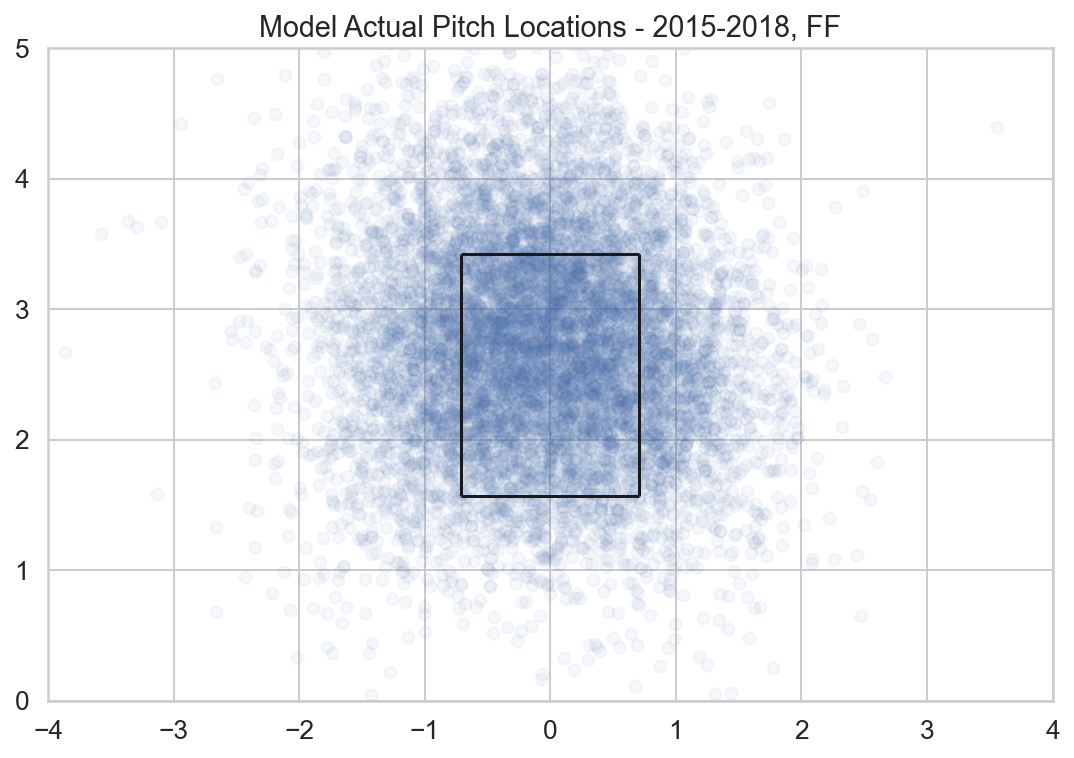

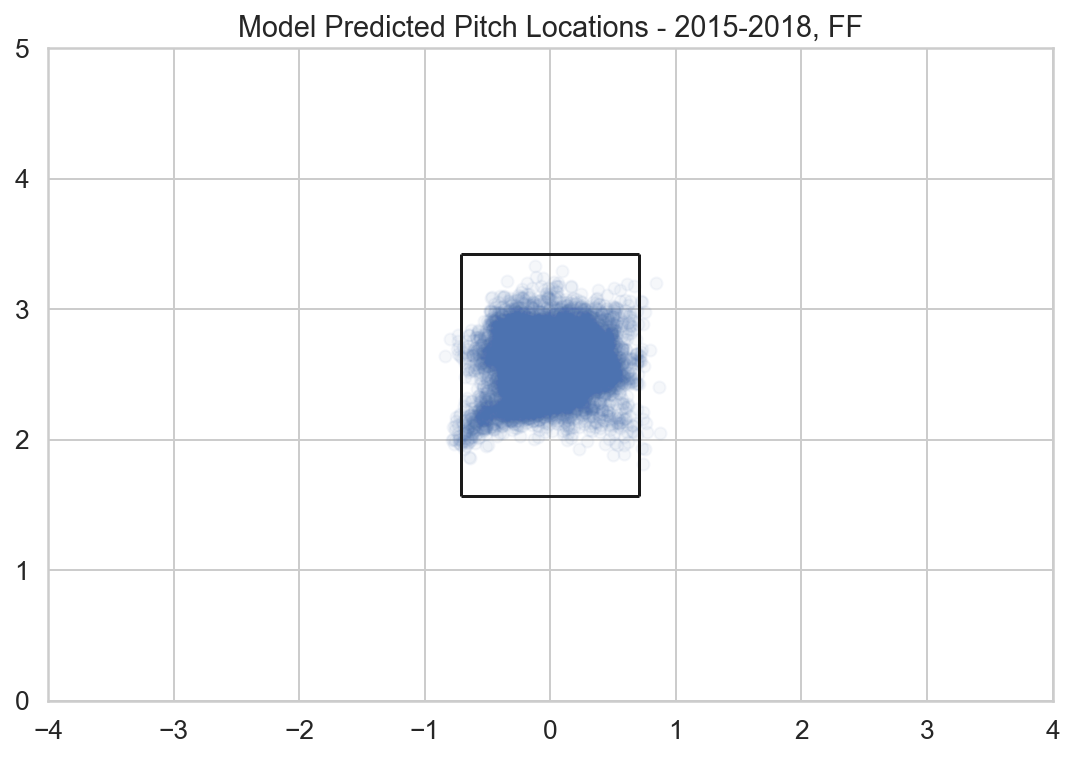

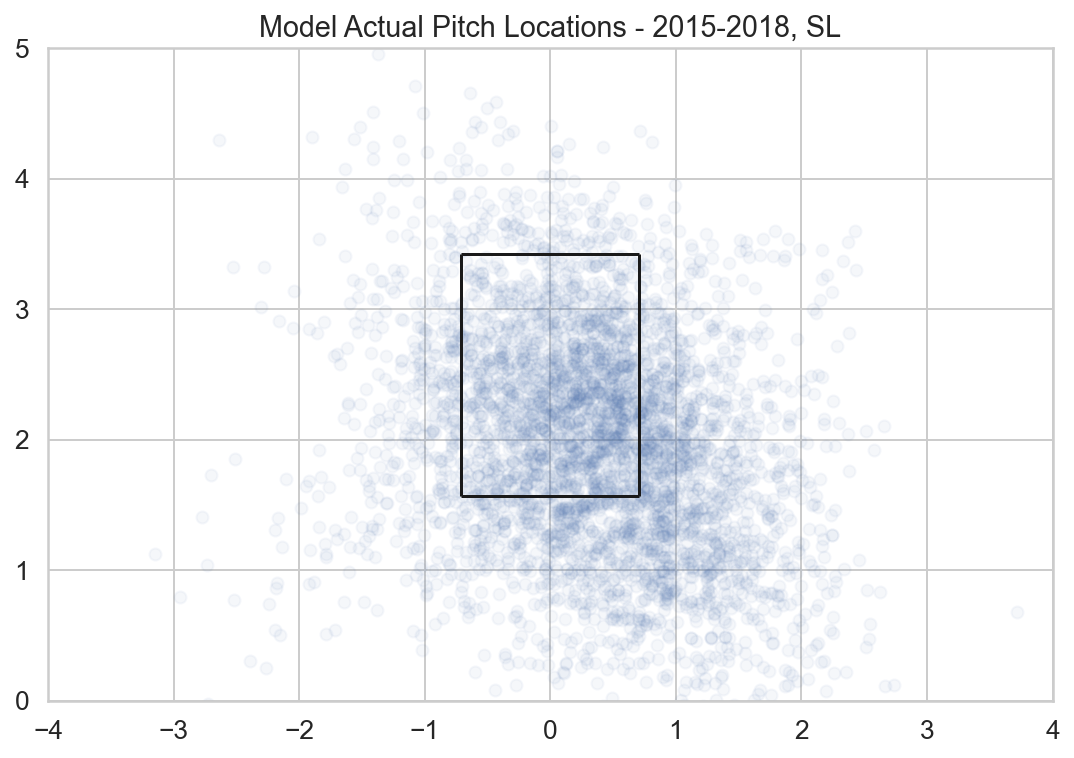

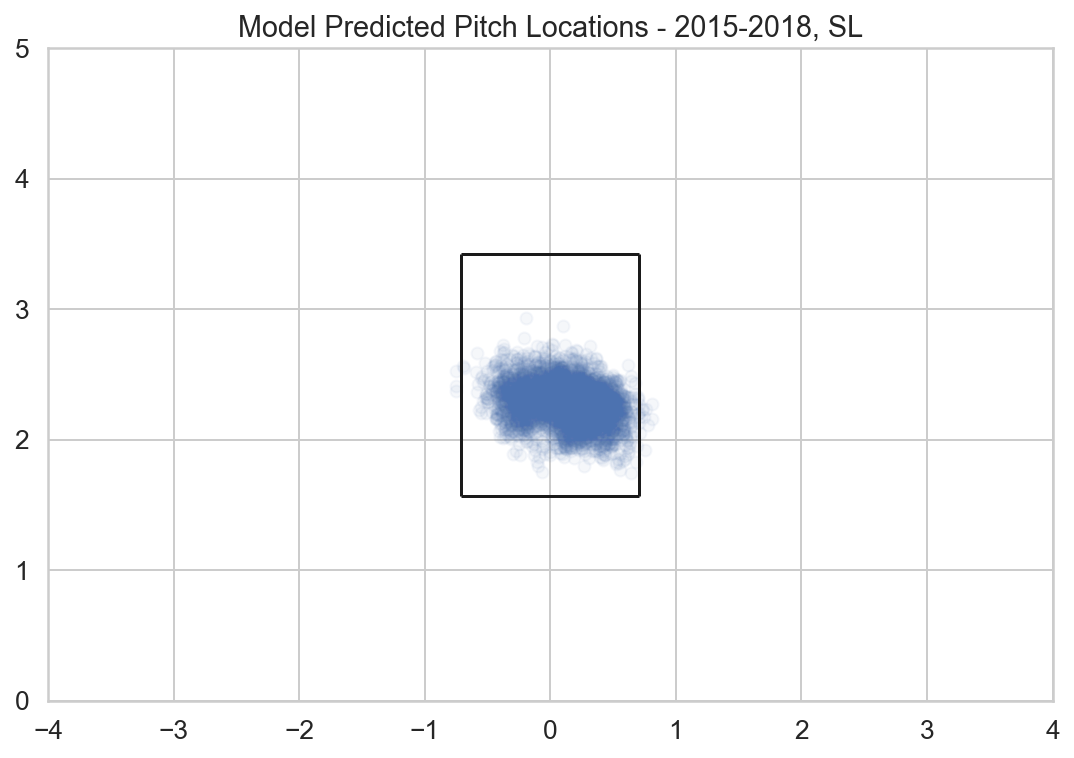

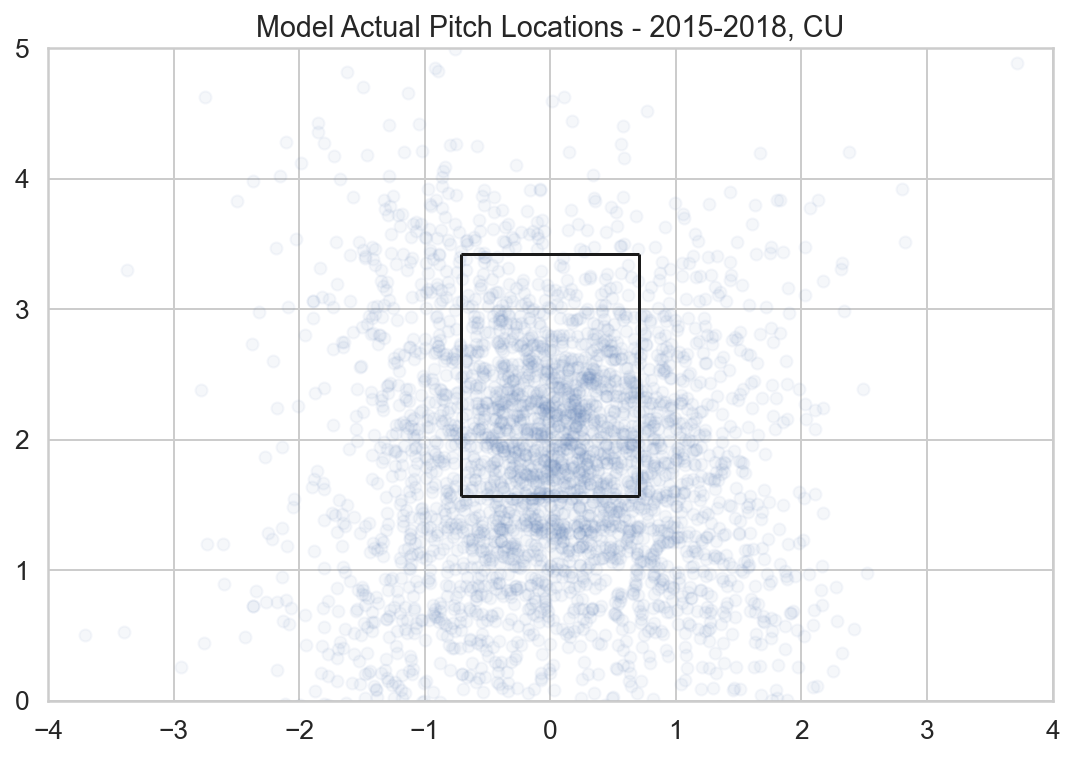

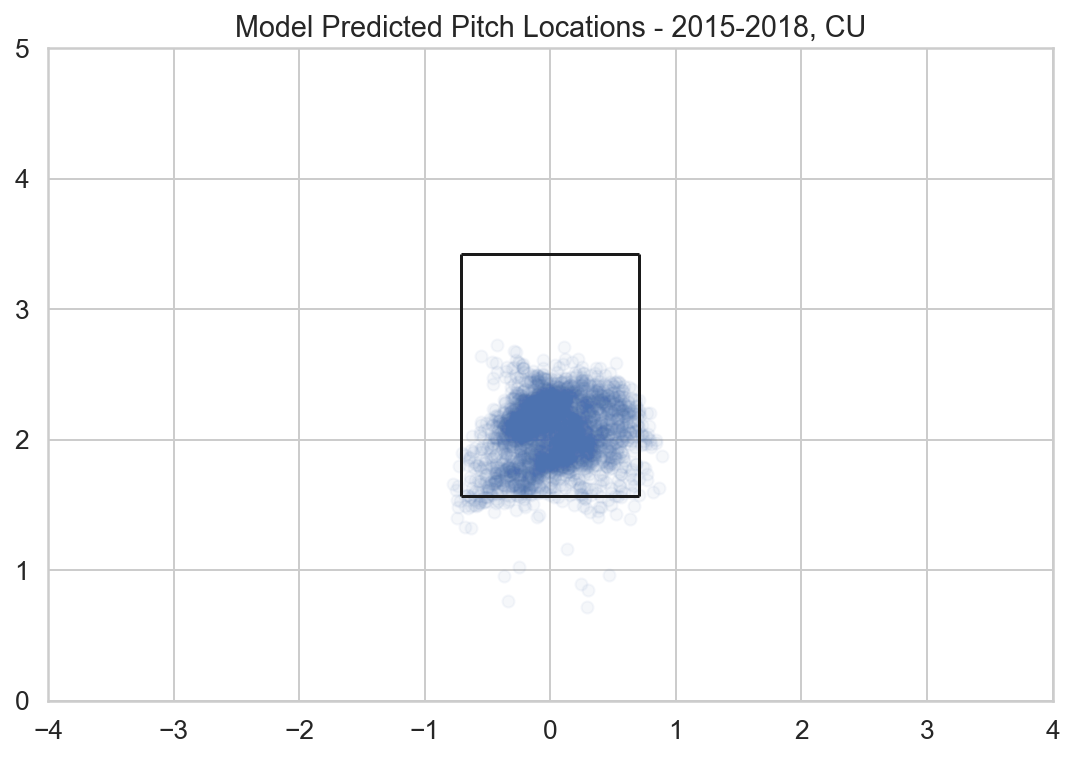

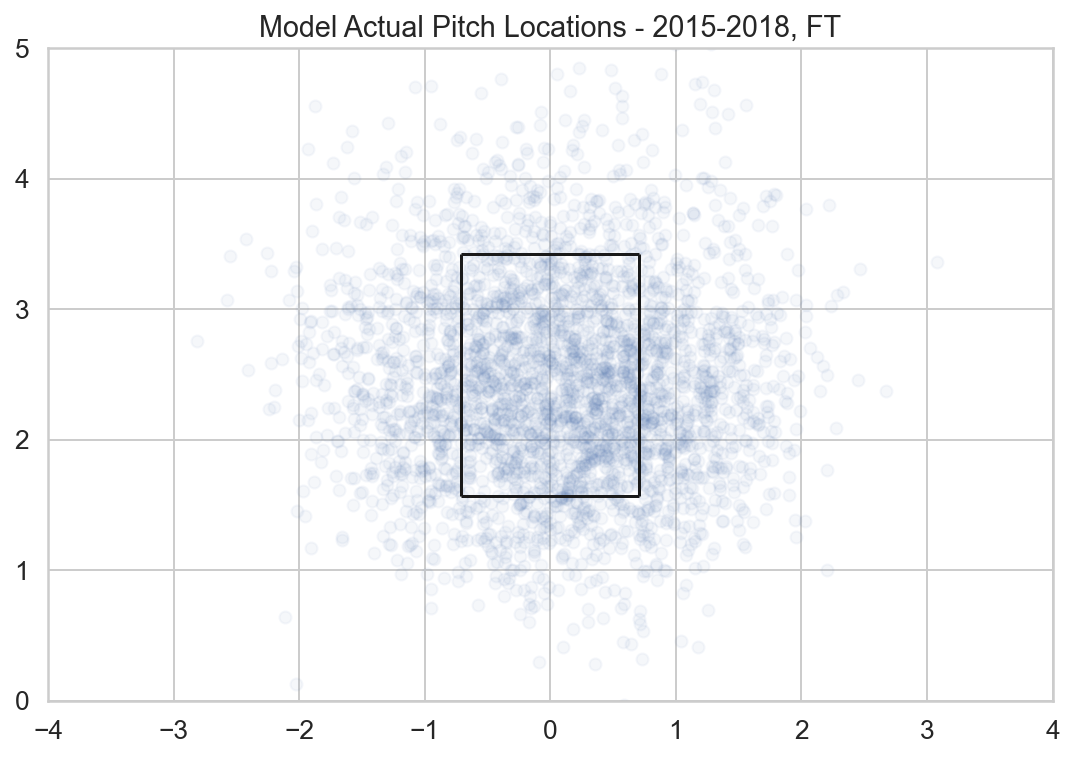

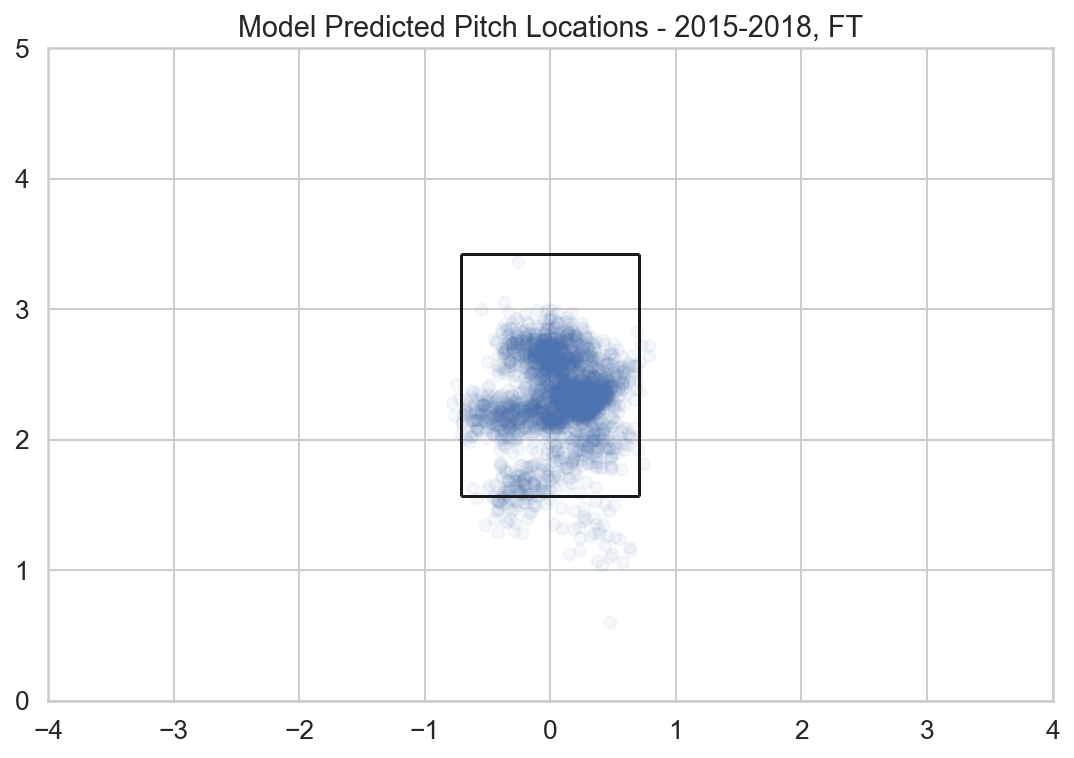

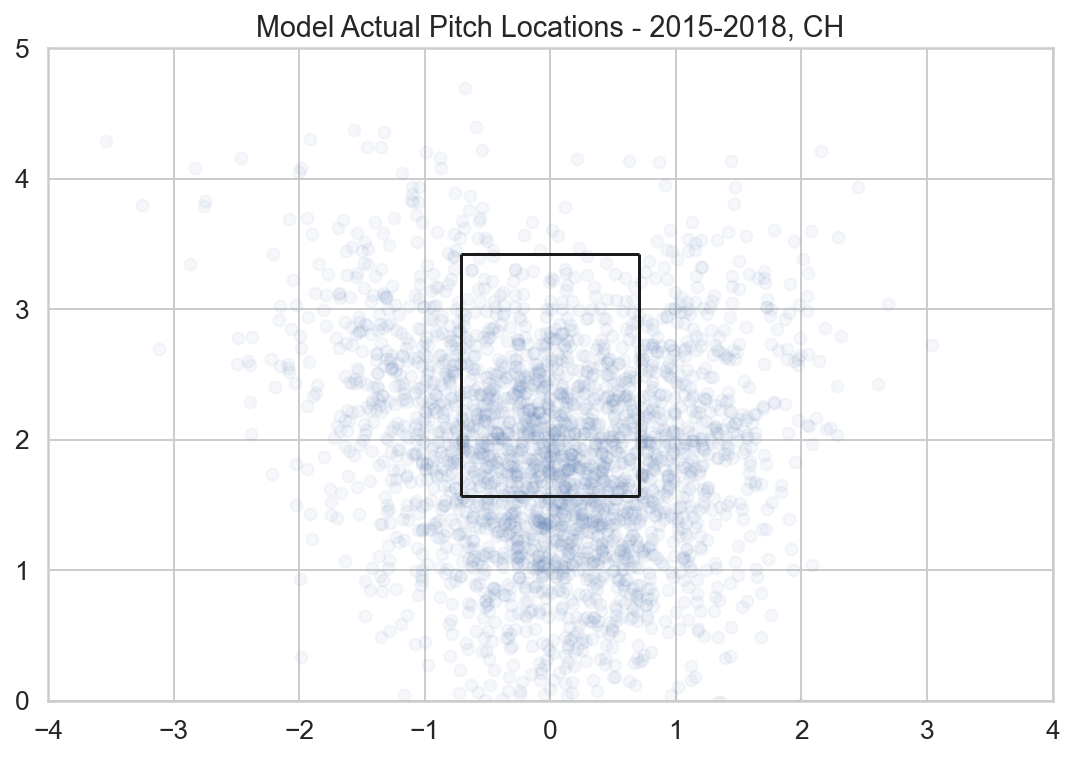

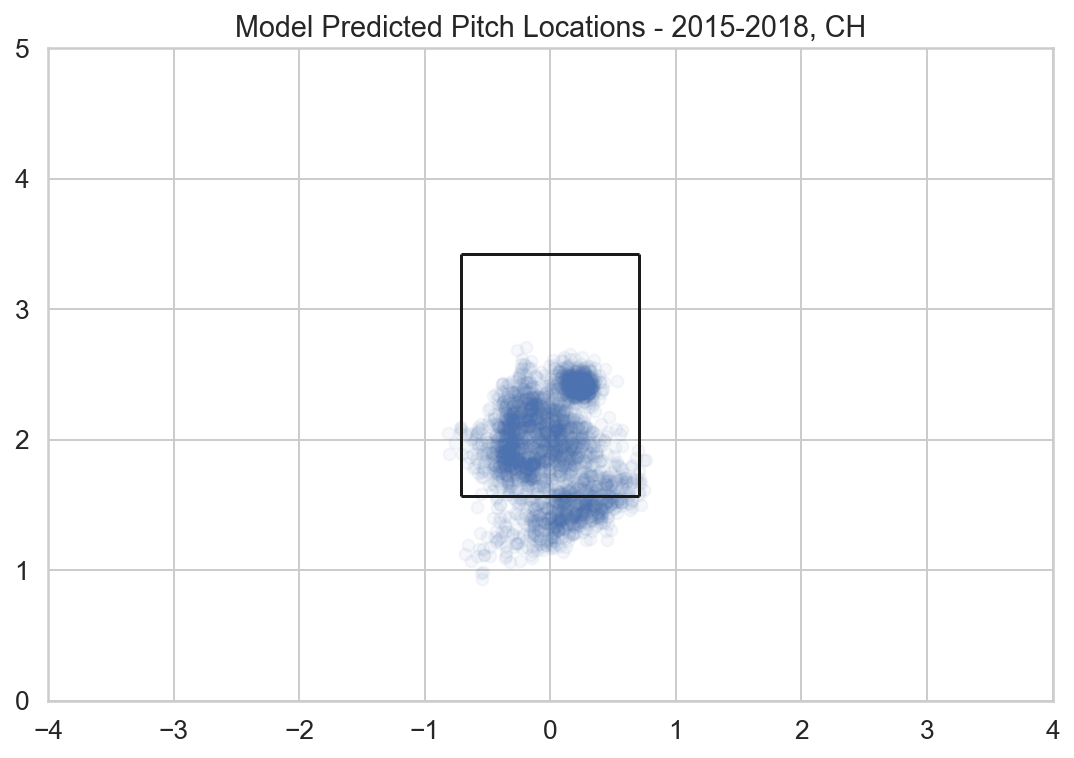

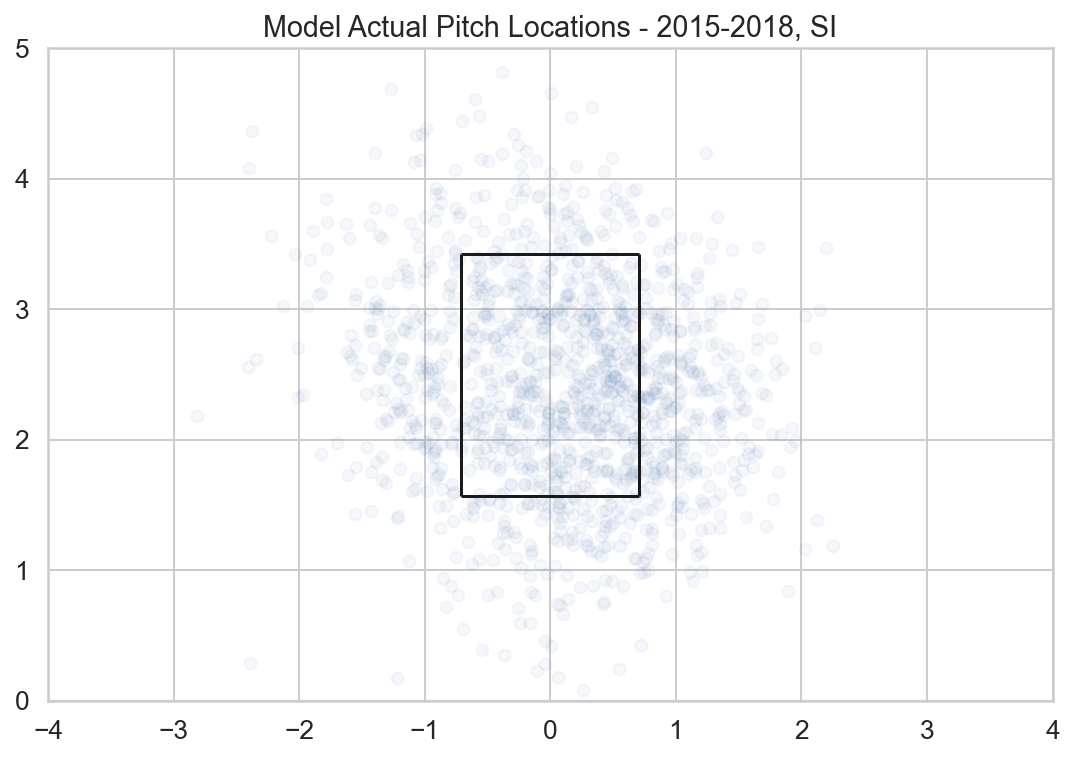

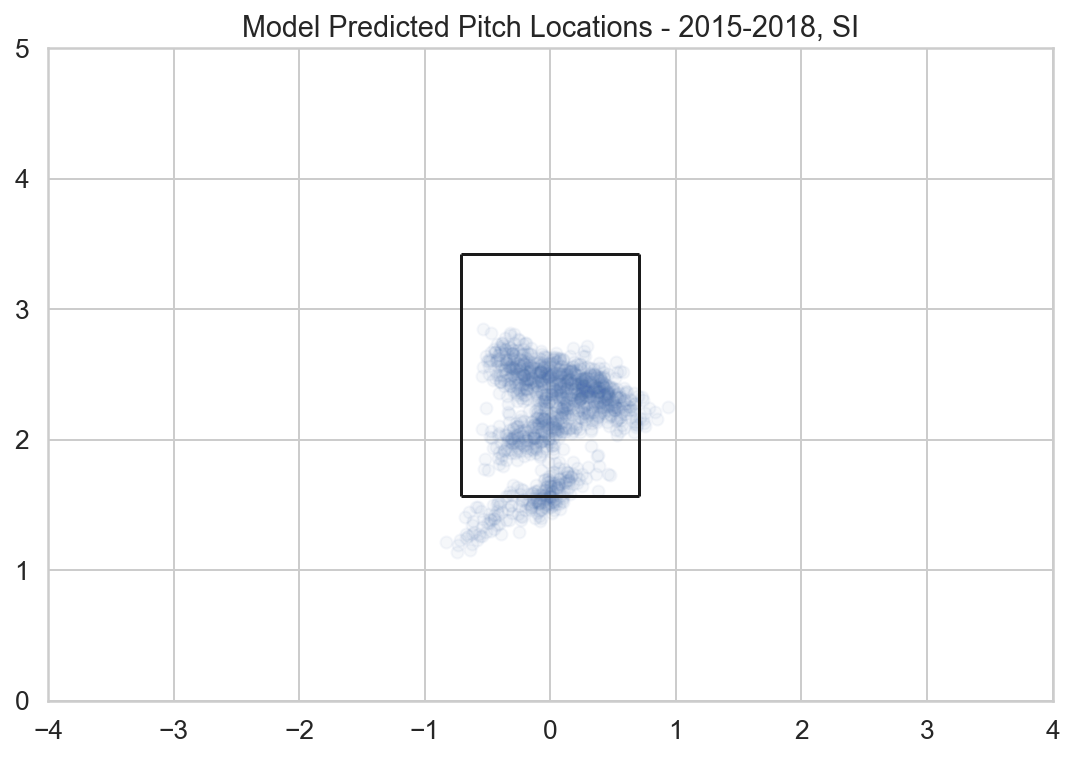

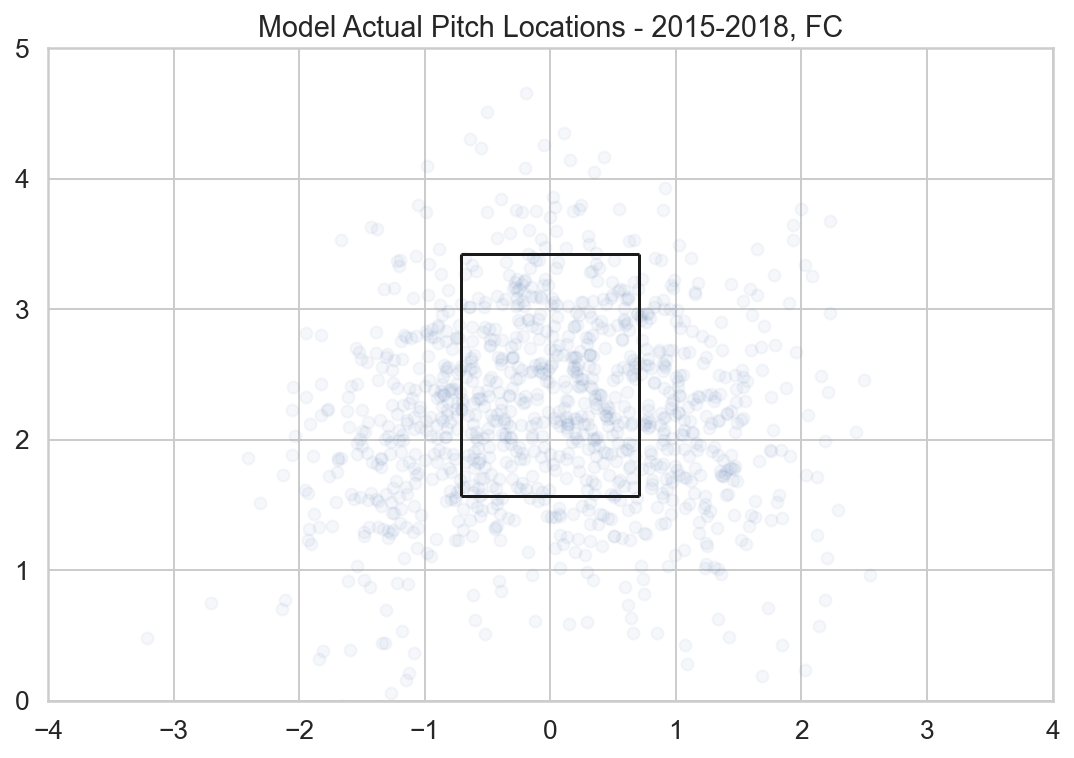

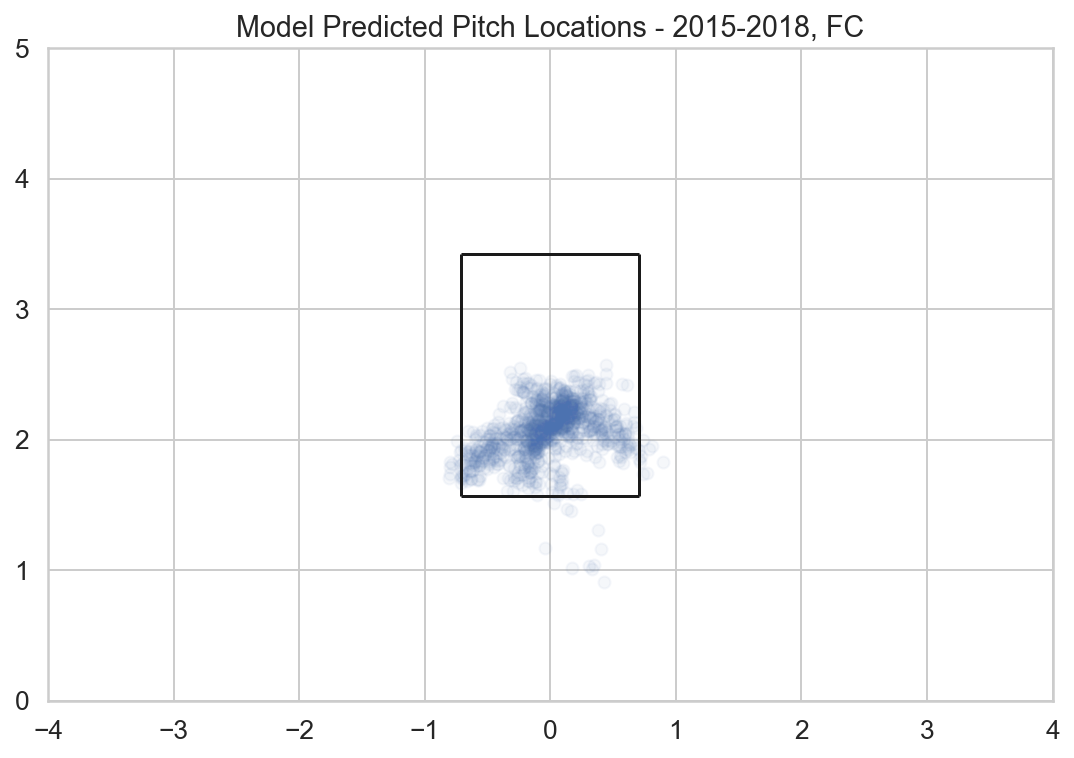

In [41]:
#plt.subplots(6, 2,figsize=(30,30))
for i, pitch_type in enumerate(pitch_type_list, 1):
    #plt.subplot(6,2,i)
    #Making even numbers actual pitches, odd predicted:
    plt.scatter(output_df['px'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], output_df['pz'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], alpha = 0.05)
    plt.title('Model Actual Pitch Locations - 2015-2018, {}'.format(pitch_type))
    strikezone_layout();

    plt.scatter(output_df['px_pred'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], output_df['pz_pred'][(output_df.last_pitch_px.notnull()) & (output_df.pitch_type == pitch_type)], alpha = 0.05)
    plt.title('Model Predicted Pitch Locations - 2015-2018, {}'.format(pitch_type))
    strikezone_layout();
        

## Most Accurate - Justin Verlander:

In [42]:
output_df[output_df.pitcher_full_name == 'Justin Verlander'].iloc[:, 33:46].tail(1)

,cumulative_ff_rate,cumulative_sl_rate,cumulative_ft_rate,cumulative_ch_rate,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate
2840574,0.587858,0.199391,0.000938,0.055395,0.153762,0.0,0.002656,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
output_df[output_df.pitcher_full_name == 'Johnny Cueto'].iloc[:, 33:46].tail(1)

,cumulative_ff_rate,cumulative_sl_rate,cumulative_ft_rate,cumulative_ch_rate,cumulative_cu_rate,cumulative_si_rate,cumulative_fc_rate,cumulative_kc_rate,cumulative_fs_rate,cumulative_kn_rate,cumulative_ep_rate,cumulative_fo_rate,cumulative_sc_rate


# Trying Random Forest Regressor

Here I'll try out a new pipeline structure with Random Forest Regressor

In [44]:
pitcher_list

Index(['Max Scherzer', 'Justin Verlander', 'Chris Archer', 'Jose Quintana',
       'Chris Sale', 'Rick Porcello', 'Jon Lester', 'Corey Kluber',
       'Gio Gonzalez', 'Julio Teheran'],
      dtype='object')

In [45]:
pitch_prediction_modeling_pipeline('Max Scherzer', outliers_removed, split_size = 0.2, class_method = 'RandomForest', reg_method = 'RandomForest')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2457937776106777
Accuracy: 0.5200764818355641
Precision: (0.45376875778712683,)
Recall: 0.22701556257020308
Random Forest Pitch Classification confusion matrix results:
[[1205  121   40    7   10    0]
 [ 378  119    8    0    0    0]
 [ 316   22   23    1    3    0]
 [ 195    7    7    1    3    0]
 [ 111    1    7    2   10    0]
 [  11    5    0    0    0    2]]
Random Forest Regression:
Val Px R^2: 0.00873214409342915
Val Px MAE: 0.6833566716288751 ft.
Val Pz R^2: 0.22354185000918114
Val Pz MAE: 0.5861585659274207 ft.


,inning,batter_id,pitcher_id,top,ab_id,p_score,event,home_team,away_team,b_score,...,Pitch_Type_Num,pitch_pred,FF_prob,SL_prob,CH_prob,CU_prob,FC_prob,FT_prob,px_pred,pz_pred
2453,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,0,0,0.73,0.13,0.01,0.01,0.12,0.00,-0.169893,2.546910
2454,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,0,0,0.55,0.16,0.04,0.03,0.22,0.00,-0.116533,2.620637
2455,3.0,527038,453286,1.0,2.015001e+09,0.0,Strikeout,was,nyn,0.0,...,0,1,0.33,0.52,0.11,0.01,0.03,0.00,0.160030,2.773912
2496,5.0,502517,453286,1.0,2.015001e+09,1.0,Flyout,was,nyn,0.0,...,0,0,0.48,0.09,0.20,0.22,0.00,0.01,-0.622380,2.847863
2497,5.0,502517,453286,1.0,2.015001e+09,1.0,Flyout,was,nyn,0.0,...,0,0,0.31,0.19,0.22,0.25,0.02,0.01,-0.288400,2.886476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824533,6.0,598284,453286,1.0,2.018179e+09,3.0,Single,was,mia,1.0,...,1,1,0.32,0.40,0.24,0.02,0.02,0.00,0.527694,1.596150
2824534,6.0,598284,453286,1.0,2.018179e+09,3.0,Single,was,mia,1.0,...,1,1,0.34,0.42,0.19,0.04,0.01,0.00,0.085328,1.716758
2824535,6.0,598284,453286,1.0,2.018179e+09,3.0,Single,was,mia,1.0,...,0,0,0.53,0.22,0.23,0.01,0.01,0.00,-0.142098,2.854974
2824536,6.0,598284,453286,1.0,2.018179e+09,3.0,Single,was,mia,1.0,...,2,0,0.55,0.24,0.16,0.04,0.01,0.00,-0.205474,1.464571


In [46]:
output_df = multiple_pitcher_predictions(pitcher_list, outliers_removed, split_size = 0.2, class_method = 'XGBoost', reg_method = 'RandomForest')

Pitch Modeling for Max Scherzer
Here is the coding for last pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5, 'UN': 6}


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Here is the coding for pitch type:
{'FF': 0, 'SL': 1, 'CH': 2, 'CU': 3, 'FC': 4, 'FT': 5}
Actual Test Size: 0.2457937776106777
[14:55:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.5193116634799235
Precision: (0.32240972836303755,)
Recall: 0.23759703603012663
XGBoost Pitch Classification confusion matrix results:
[[1140  140   69   18   12    4]
 [ 328  157   12    5    0    3]
 [ 270   36   42   12    5    0]
 [ 189    8    7    6    2    1]
 [ 104    2    9    4   12    0]
 [   7    7    2    1    0    1]]
Random Forest Regression:
Val Px R^2: 0.018822603197836907
Val Px MAE: 0.680536512869394 ft.


KeyboardInterrupt: 